# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston). Возмите 7 любых  регрессоров (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,8# посмотрим на пропуски в данных (Missing Attribute Values: None)

In [2]:
from sklearn.datasets import load_boston 
data = pd.read_csv(load_boston()['filename'], skiprows=1)   # skiprows пропуск 1 строчки, перенос заголовка
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Подготовим датасет к модели

In [3]:
# посмотрим на пропуски в данных (Missing Attribute Values: None)
data.isnull().sum()
# пропусков нет

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
data.info()
# категориальных признаков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
X = data.drop(['MEDV'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

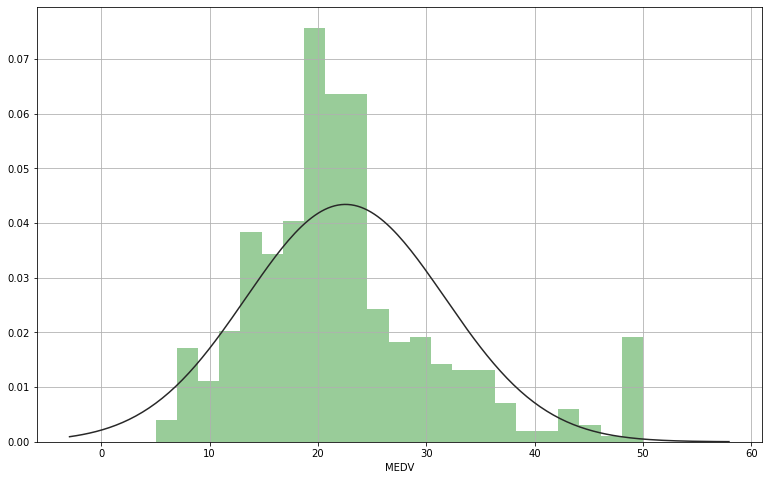

In [7]:
# график распределения с гистограммой и максимальным правдоподобием гауссовского распределения
from scipy.stats import norm

sns.distplot(y, fit=norm, kde=False, color='g')
plt.grid()

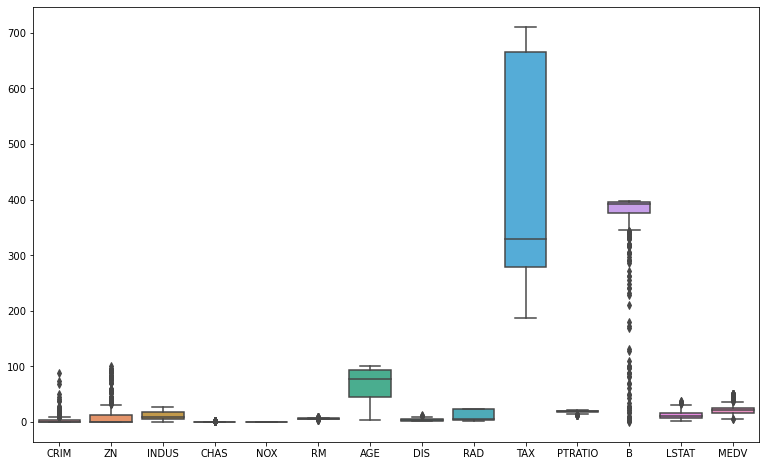

In [8]:
# boxplot
sns.boxplot(data=data)

Целевая переменная распределена почти нормально с небольшим количеством выбросов

In [9]:
# Будем использовать линейную регрессию для тестирования качества данных

class prediction:
    
    def _init_(self):
        self= self
        
    def get_score(self, X, y, model=None, random_seed=42):
        self.model = model
        self.X = X
        self.y = y
        if self.model is None:
            self.model = LinearRegression()
            
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=random_seed )
        self.X_test = X_test
        self.y_test = y_test
        self.model.fit(X_train, y_train)
        score = self.model.score(X_test, y_test)
                        
        from sklearn.model_selection import cross_val_score
        from sklearn.model_selection import ShuffleSplit
        # Судя по результатам Cross-Validation, R^2 score очень сильно различается для разных частей датасета 
        # и в нашем случае постоянно ухудшается,
        # попробуем перетасовать датасет перед тем как делать Cross-Validation.
        cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)    
        scores = cross_val_score(self.model, self.X, self.y, cv=cv)
        
        return print(scores.mean(), score)

    def plot(self):
        plt.figure(figsize=(5,4))
        predictions = self.model.predict(self.X_test)
        sns.set_style('dark')
        plot = sns.scatterplot(self.y_test, predictions)
        plot.set(xlabel='Given', ylabel='Prediction')
        x_plot = np.linspace(-5,50,100)
        y_plot = x_plot
        plt.plot(x_plot, y_plot, color='r')
        plt.grid()
        plt.show()

0.7013588772099737 0.7112260057484923


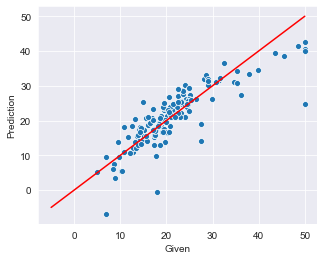

In [10]:
p = prediction()
p.get_score(X=data.iloc[:,:-1], y=y)   # первоначальный датафрейм
p.plot()

In [11]:
# прологарифмируем признаки с широким диапазоном значений, ассимметричным распределением (длинные хвосты box-plot)

X['TAX'] = np.log(X['TAX'] + 0.0000001).to_numpy()

0.7015015717222808 0.7141903777893004


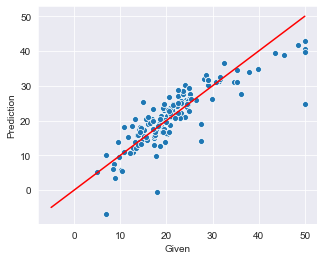

In [12]:
p.get_score(X=X, y=y)   # после логарифмирования (улучшилось немного)
p.plot()

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.608739,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-1.117412,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-1.117412,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.335255,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.335255,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.813014,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.813014,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.813014,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.813014,1.176466,0.403225,-0.865302


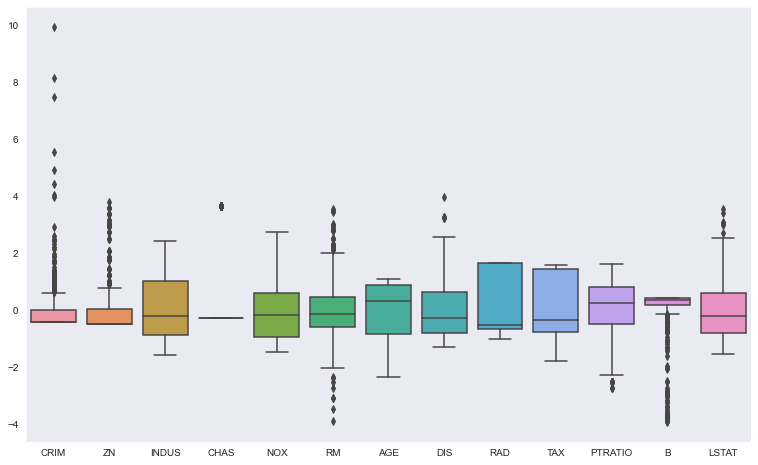

In [14]:
sns.boxplot(data=X)

0.7015015717222814 0.7141903777893015


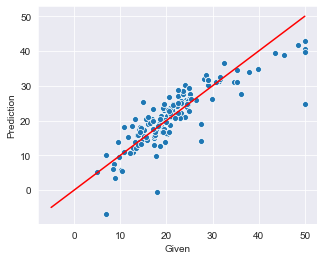

In [15]:
p.get_score(X=X, y=y)   # после стандартизации (улучшилось немного )
p.plot() 

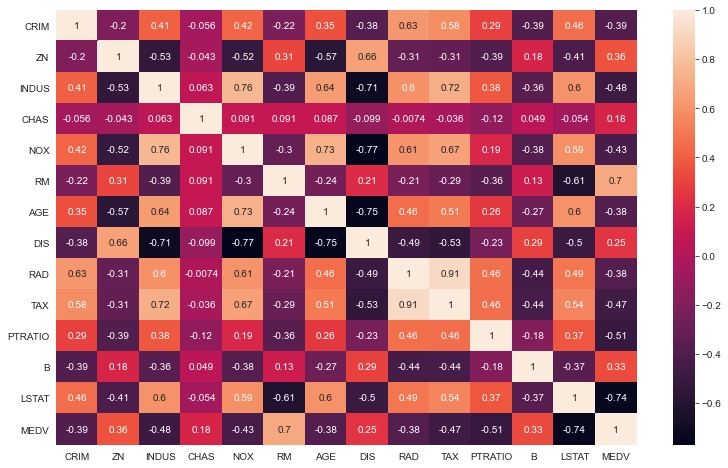

In [16]:
# матрица корреляции, которая измеряет линейные отношения между переменными
sns.heatmap(data=data.corr(), cbar=True, annot=True)

Коэффициент корреляции варьируется [-1,1]. Если значение близко к |1|, это означает, что между двумя переменными существует сильная положительная (+1) или отрицательная (-1) корреляция.

'RAD' и 'TAX', 'DIS' и ('INDUS', 'NOX', 'AGE'), 'INDUS' и 'NOX' имеют высокую корреляцию между собой (первые и третьи - положительную, вторые - отрицательную), один из этих признаков в паре можно удалить. 

С целевой переменной более всего скореллированы 'RM' (прямая) и 'LSTAT' (обратная), наименее скоррелирована 'CHAS'

In [17]:
cor = data.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
c = pd.DataFrame(np.tril(cor, k=0), index=data.columns, columns = data.columns)
c

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ZN,-0.200469,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
INDUS,0.406583,-0.533828,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.000000,0.000000,0.000000,0.0


In [19]:
loc = {}
c = pd.DataFrame(np.tril(cor, k=0), index=data.columns, columns = data.columns)
for i in c.itertuples():
    num = 0
    for j in i:
        if type(j) != type('aaa'):
            if abs(j) >= 0.75:
                loc[(i[0], cor.columns[num])] = j
            num += 1    
print(loc)
print()

loc2 = {}
for i, j in loc.items():
    if i[0]!=i[1]:
        loc2[i]=j        

print(loc2)
print()

print('Корреляция с целевой переменной "MEDV" при |k|>=0.75:')
cor_y = []
for i in loc2.keys():
    if 'MEDV' in i[0]:
        cor_y.append(i[0])
    if 'MEDV' in i[1]:
        cor_y.append(i[1])
print(cor_y)
print()        
        
print('Корреляция признаков при |k|>=0.75:')
cor_x =[]
for i in loc2.keys():
    if 'MEDV' not in i:
        cor_x.append(i)
print(cor_x)
print()

loc3={}    # малая корреляция с целевой переменной
loc4 = {}  
for i in c.itertuples():
    if i[0]=='MEDV':
        num = 0
        for j in i:
            if type(j) != type('aaa'):
                if cor.columns[num] != 'MEDV':
                    loc4[cor.columns[num]] = j
                    if abs(j) <= 0.20:
                        loc3[cor.columns[num]] = j
                    num += 1
        else:
            pass
print('Малая корреляция с целевой переменной |k|<=0.20:')
print(loc3)
print()

import operator
loc4max = max(loc4.items(), key=operator.itemgetter(1))[0]
loc4min = min(loc4.items(), key=operator.itemgetter(1))[0]
loc5 = [loc4max, loc4min]
print('Наибольшая корреляция с целевой переменной:')
print(loc5)

{('CRIM', 'CRIM'): 1.0, ('ZN', 'ZN'): 1.0, ('INDUS', 'INDUS'): 1.0, ('CHAS', 'CHAS'): 1.0, ('NOX', 'INDUS'): 0.7636514469209139, ('NOX', 'NOX'): 1.0, ('RM', 'RM'): 1.0, ('AGE', 'AGE'): 1.0, ('DIS', 'NOX'): -0.7692301132258282, ('DIS', 'DIS'): 1.0, ('RAD', 'RAD'): 1.0, ('TAX', 'RAD'): 0.9102281885331865, ('TAX', 'TAX'): 1.0, ('PTRATIO', 'PTRATIO'): 1.0, ('B', 'B'): 1.0, ('LSTAT', 'LSTAT'): 1.0, ('MEDV', 'MEDV'): 1.0}

{('NOX', 'INDUS'): 0.7636514469209139, ('DIS', 'NOX'): -0.7692301132258282, ('TAX', 'RAD'): 0.9102281885331865}

Корреляция с целевой переменной "MEDV" при |k|>=0.75:
[]

Корреляция признаков при |k|>=0.75:
[('NOX', 'INDUS'), ('DIS', 'NOX'), ('TAX', 'RAD')]

Малая корреляция с целевой переменной |k|<=0.20:
{'CHAS': 0.17526017719029868}

Наибольшая корреляция с целевой переменной:
['RM', 'LSTAT']


In [20]:
# удалим коррелируемые признаки
delit=[]
for i in cor_x:
    if (i[0] in delit) or (i[1] in delit):
        pass
    else:
        delit.append(i[0])
        
print(delit)

['NOX', 'TAX']


In [21]:
X_drop_corr_x = X.drop(delit, axis=1)
X_drop_corr_x

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,0.413672,-0.120013,0.140214,-0.982843,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,0.194274,0.367166,0.557160,-0.867883,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,1.282714,-0.265812,0.557160,-0.867883,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,1.016303,-0.809889,1.077737,-0.752922,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,1.228577,-0.511180,1.077737,-0.752922,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.439316,0.018673,-0.625796,-0.982843,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,-0.234548,0.288933,-0.716639,-0.982843,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.984960,0.797449,-0.773684,-0.982843,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.725672,0.736996,-0.668437,-0.982843,1.176466,0.403225,-0.865302


0.6807216876465821 0.6749511769389577


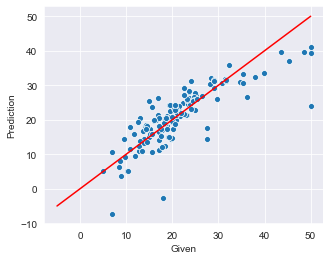

In [22]:
p.get_score(X=X_drop_corr_x, y=y)   # после удаления корр.признаков (ухудшилось, скорее всего из-за корреляции с целевой переменной)
p.plot()

In [23]:
# попробуем качество модели с удалением признака, мало скоррелированного с целевой переменной
X_drop_corr_y = X.drop(loc3, axis=1)
X_drop_corr_y

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.608739,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-1.117412,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-1.117412,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.335255,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.335255,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.813014,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.813014,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.813014,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.813014,1.176466,0.403225,-0.865302


0.6963625040096054 0.7112477240912224


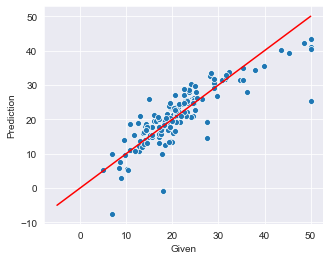

In [24]:
p.get_score(X=X_drop_corr_y, y=y)   # после удаления слабо корр.признаков по y (ухудшилось)
p.plot()

Работа с корреляцией признаков в данном случае ничего не дает. Попробуем сделать PCA.

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
X_psa = pca.fit_transform(X)
X_psa

array([[-2.07683296,  0.77343995,  0.32931753, ..., -0.07275785,
         0.00421187, -0.36600165],
       [-1.49387129,  0.59661246, -0.74982281, ..., -0.62176305,
         0.01153396,  0.2224963 ],
       [-2.11525417,  0.6470577 ,  0.10011473, ..., -0.44617062,
         0.23212275,  0.11538315],
       ...,
       [-0.30876995,  1.15048674, -0.47193979, ...,  0.09511509,
         0.24934998, -0.16730761],
       [-0.26649435,  1.02798756, -0.64179538, ...,  0.07409072,
         0.27582707, -0.15177041],
       [-0.12004413,  0.71649825, -1.33372178, ...,  0.17664836,
         0.20642918, -0.0962337 ]])

0.7015015717222812 0.7141903777893012


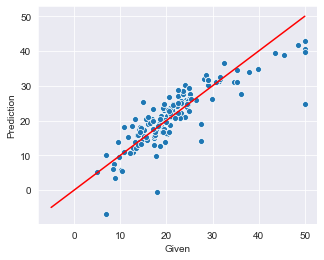

In [26]:
p.get_score(X=X_psa, y=y)   # после psa (ухудшилось)
p.plot()

Попробуем "обрезать" выбросы X

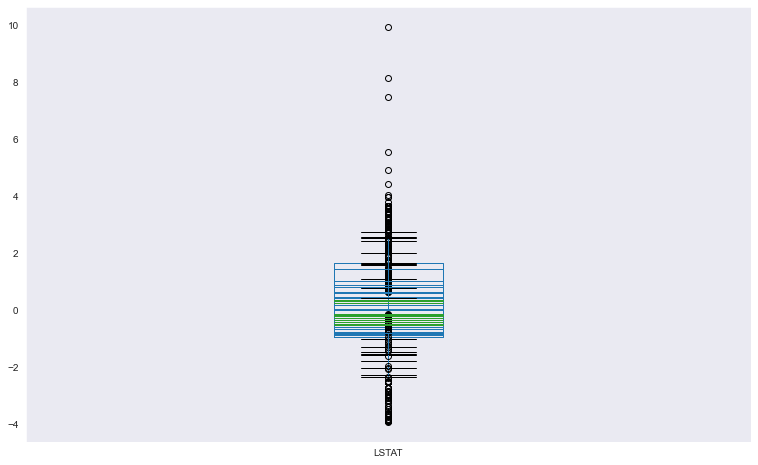

In [27]:
index = []
for i in X:
    _, bp = X[i].plot.box(return_type='both')
    outliers = [flier.get_ydata() for flier in bp['fliers']][0]
    dbox = X[X[i].isin(outliers)]
    for t in dbox.iterrows():
        index.append(t[0])
index = set(index)
X_new = X.drop(index, axis=0)
y_new = y.drop(index, axis=0)

0.48604232019810095 0.44566334955672116


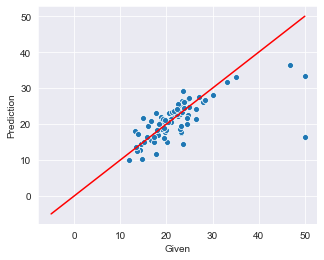

In [28]:
p.get_score(X=X_new, y=y_new)   # после удаления выбросов (ухудшилось, потому, что осталось мало данных, наверно)
p.plot()

Удалим выбросы только с самых корр.признаков с целевой переменной

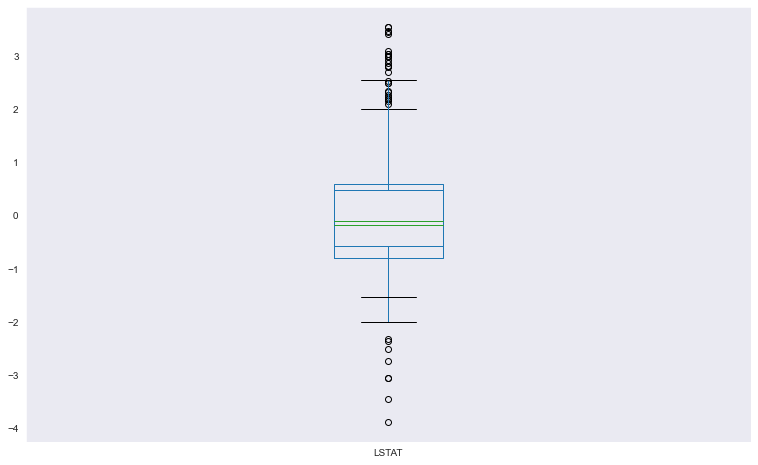

In [29]:
index2 = []
for i in loc5:
    _, bp = X[i].plot.box(return_type='both')
    outliers = [flier.get_ydata() for flier in bp['fliers']][0]
    dbox = X[X[i].isin(outliers)]
    for t in dbox.iterrows():
        index2.append(t[0])
index2 = set(index2)
X_new2 = X.drop(index2, axis=0)
y_new2 = y.drop(index2, axis=0)

0.6513070665738159 0.7392270938364576


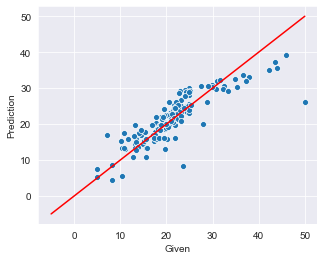

In [30]:
p.get_score(X=X_new2, y=y_new2)   # после удаления выбросов (ухудшилось, но сомнительно)
p.plot()

Попробуем удалить выбросы только с самым (одним) корр.признаком 'LSTAT'

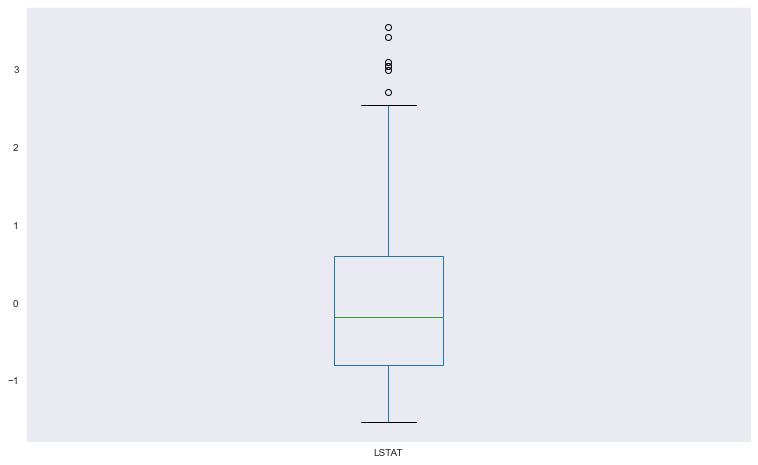

In [31]:
index3 = []
_, bp = X['LSTAT'].plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp['fliers']][0]
dbox = X[X['LSTAT'].isin(outliers)]
for t in dbox.iterrows():
    index3.append(t[0])
index3 = set(index3)
X_new3 = X.drop(index3, axis=0)
y_new3 = y.drop(index3, axis=0)

0.6775531142522846 0.7671394438635244


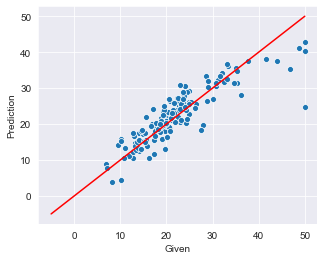

In [32]:
p.get_score(X=X_new3, y=y_new3)   # после удаления выбросов с самой корр.пер. с y (улучшилось)
p.plot()

Попробуем нагенерировать дополнительные признаки для улучшения модели

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=False, include_bias=True)
X_new4 = poly.fit_transform(X_new3)

0.7677112630075534 0.8014730378719412


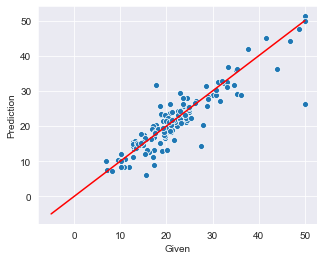

In [34]:
p.get_score(X=X_new4, y=y_new3)   # после добавления признаков (улучшилось)
p.plot()

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=False, include_bias=False)
X_new5 = poly.fit_transform(X_new3)

0.7735546007358364 0.8023515578046181


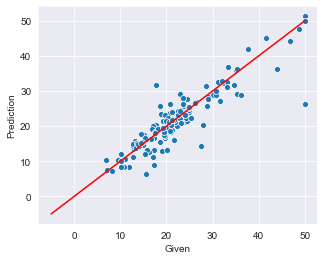

In [36]:
p.get_score(X=X_new5, y=y_new3)   # после добавления признаков (улучшилось)
p.plot()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, interaction_only=False, include_bias=True)
X_new6 = poly.fit_transform(X_new3)

-43.92409305724135 -36.19885156518279


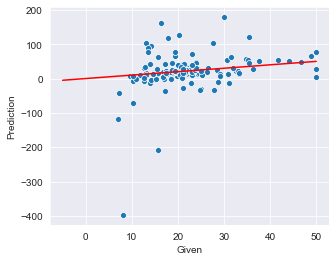

In [38]:
p.get_score(X=X_new6, y=y_new3)   # после добавления признаков (ухудшилось)
p.plot()

Остановимся на X_new5, y_new3.

### Возьмем 7 любых  регрессоров (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
from scipy.stats import uniform

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC

In [42]:
models = [
    {'name':'LR', 'model': LinearRegression(), 'params': {'n_jobs': [-1]}},
    {'name':'R', 'model': Ridge(), 'params': {'alpha': uniform(loc=0, scale=4), 'tol': uniform(loc=0, scale=0.1), 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'random_state': [None, 1]}},
    {'name':'L', 'model': Lasso(), 'params': {'alpha': uniform(loc=0, scale=4), 'tol': uniform(loc=0, scale=0.1), 'warm_start': [False, True], 'selection': ['cyclic', 'random'], 'random_state': [None, 1]}},
    {'name':'EN', 'model': ElasticNet(), 'params': {'alpha': uniform(loc=0, scale=4), 'l1_ratio': uniform(loc=0, scale=1), 'tol': uniform(loc=0, scale=0.2), 'warm_start': [False, True], 'selection': ['cyclic', 'random'], 'random_state': [None, 1]}},
    {'name':'SGDR', 'model': SGDRegressor(), 'params': {'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': uniform(loc=0, scale=4), 'l1_ratio': uniform(loc=0, scale=1), 'tol': uniform(loc=0, scale=0.2), 'shuffle': [False, True], 'epsilon': uniform(loc=0, scale=1), 'random_state': [None, 1], 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'early_stopping': [False, True], 'validation_fraction': uniform(loc=0, scale=1), 'warm_start': [False, True], 'average': [False, True, 1, 2, 3]}},
    {'name':'RF', 'model': RandomForestRegressor(), 'params': {'n_estimators':[10,25,50,100,150,200], 'criterion':['mse', 'mae'], 'max_depth':[3,5,7,9,11], 'n_jobs': [-1]}},
    {'name':'KN', 'model': KNeighborsRegressor(), 'params': {'n_neighbors':list(range(1,30)),'weights': ['uniform', 'distance'], 'p':[1,2,3]}},
    {'name':'DTR', 'model': DecisionTreeRegressor(), 'params': {'criterion':['mse', 'mae'], 'max_depth':[3,5,7,9,11]}}
]

In [43]:
X_new5 = pd.DataFrame(X_new5)
y_new3 = pd.DataFrame(y_new3)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new5,y_new3)

In [45]:
import warnings
warnings.filterwarnings('ignore')

res=[]
for v in  models:
    res.append((v['name'], RandomizedSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train)))

In [46]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)
    print()

LR 0.7565501815387663 {'n_jobs': -1}

R 0.8036845532684133 {'alpha': 3.2460718247942206, 'random_state': None, 'solver': 'cholesky', 'tol': 0.098419840612204}

L 0.7636244805794605 {'alpha': 0.11464289683408557, 'random_state': None, 'selection': 'random', 'tol': 0.04236268217572983, 'warm_start': False}

EN 0.6859694760194391 {'alpha': 1.4016221452344673, 'l1_ratio': 0.2980919746505126, 'random_state': 1, 'selection': 'random', 'tol': 0.15348595664659798, 'warm_start': False}

SGDR -7.738477826423181 {'alpha': 3.583375833766774, 'average': False, 'early_stopping': True, 'epsilon': 0.039999285715758615, 'l1_ratio': 0.35996312338421066, 'learning_rate': 'constant', 'loss': 'huber', 'penalty': 'l1', 'random_state': 1, 'shuffle': False, 'tol': 0.13965710848216273, 'validation_fraction': 0.7922481840829504, 'warm_start': False}

RF 0.8238920401076039 {'n_jobs': -1, 'n_estimators': 200, 'max_depth': 11, 'criterion': 'mse'}

KN 0.7679466818405387 {'weights': 'distance', 'p': 1, 'n_neighbors'

In [47]:
# устанавливаем параметры, рекомендованные RandomizedSearchCV, детально проверяем GridSearchCV
models2 = [
    {'name':'LR', 'model': LinearRegression(), 'params': {'n_jobs': [-1]}},
    {'name':'R', 'model': Ridge(), 'params': {'alpha': np.arange(3.5, 4, 0.05), 'tol': np.arange(0.05, 0.08, 0.01)}},
    {'name':'L', 'model': Lasso(), 'params': {'alpha': np.arange(0.05, 1, 0.05), 'tol': np.arange(0.02, 0.05, 0.01), 'warm_start': [True], 'selection': ['random'], 'random_state': [1]}},
    {'name':'EN', 'model': ElasticNet(), 'params': {'alpha': np.arange(0.09, 0.2, 0.01), 'l1_ratio': np.arange(0.1, 0.3, 0.05), 'tol': np.arange(0.01, 0.03, 0.01), 'selection': ['random'], 'random_state': [1]}},
    {'name':'SGDR', 'model': SGDRegressor(), 'params': {'loss': ['huber'], 'penalty': ['l2'], 'alpha': np.arange(1.15, 1.5, 0.05), 'l1_ratio': np.arange(0.35, 0.7, 0.05), 'tol': np.arange(0.08, 0.16, 0.04), 'shuffle': [False], 'epsilon': np.arange(0.6, 0.9, 0.05), 'random_state': [1], 'learning_rate': ['optimal'], 'validation_fraction': np.arange(0.5, 0.7, 0.05), 'average': [2]}},
    {'name':'RF', 'model': RandomForestRegressor(), 'params': {'n_estimators': np.arange(130, 170, 5), 'max_depth':np.arange(7, 10, 1), 'n_jobs': [-1]}},
    {'name':'KN', 'model': KNeighborsRegressor(), 'params': {'n_neighbors':np.arange(1, 5, 1),'weights': ['uniform'], 'p':[1]}},
    {'name':'DTR', 'model': DecisionTreeRegressor(), 'params': {'criterion':['mae'], 'max_depth':np.arange(3, 7, 1)}}
]

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
import warnings
warnings.filterwarnings('ignore')

res2=[]
for v in  models2:
    res2.append((v['name'], GridSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train)))

In [50]:
for r2 in res2:
    print(r2[0], r2[1].best_score_, r2[1].best_params_)
    print()

LR 0.7565501815387663 {'n_jobs': -1}

R 0.8047699944390629 {'alpha': 3.9499999999999984, 'tol': 0.05}

L 0.7979788759031636 {'alpha': 0.05, 'random_state': 1, 'selection': 'random', 'tol': 0.02, 'warm_start': True}

EN 0.7929095419667359 {'alpha': 0.09, 'l1_ratio': 0.1, 'random_state': 1, 'selection': 'random', 'tol': 0.02}

SGDR -1.7334977622215562 {'alpha': 1.15, 'average': 2, 'epsilon': 0.9000000000000002, 'l1_ratio': 0.35, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'l2', 'random_state': 1, 'shuffle': False, 'tol': 0.08, 'validation_fraction': 0.5}

RF 0.8294207069770316 {'max_depth': 8, 'n_estimators': 135, 'n_jobs': -1}

KN 0.756914000783888 {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

DTR 0.7348548533696141 {'criterion': 'mae', 'max_depth': 4}



In [51]:
a = dict(zip(res, res2))

In [52]:
a

{('LR',
  RandomizedSearchCV(cv=10, estimator=LinearRegression(),
                     param_distributions={'n_jobs': [-1]})): ('LR',
  GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={'n_jobs': [-1]})),
 ('R',
  RandomizedSearchCV(cv=10, estimator=Ridge(),
                     param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204554C43A0>,
                                          'random_state': [None, 1],
                                          'solver': ['auto', 'svd', 'cholesky',
                                                     'lsqr', 'sparse_cg', 'sag',
                                                     'saga'],
                                          'tol': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000204554C4610>})): ('R',
  GridSearchCV(cv=10, estimator=Ridge(),
               param_grid={'alpha': array([3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95]),
                           'to

In [53]:
for i,j in a.items():
    print(i[0])
    print('RandomizedSearchCV:', i[1].best_score_, '//', 'GridSearchCV:', j[1].best_score_)
    print('RandomizedSearchCV:', i[1].best_params_, '//', 'GridSearchCV:', j[1].best_params_)
    print()

LR
RandomizedSearchCV: 0.7565501815387663 // GridSearchCV: 0.7565501815387663
RandomizedSearchCV: {'n_jobs': -1} // GridSearchCV: {'n_jobs': -1}

R
RandomizedSearchCV: 0.8036845532684133 // GridSearchCV: 0.8047699944390629
RandomizedSearchCV: {'alpha': 3.2460718247942206, 'random_state': None, 'solver': 'cholesky', 'tol': 0.098419840612204} // GridSearchCV: {'alpha': 3.9499999999999984, 'tol': 0.05}

L
RandomizedSearchCV: 0.7636244805794605 // GridSearchCV: 0.7979788759031636
RandomizedSearchCV: {'alpha': 0.11464289683408557, 'random_state': None, 'selection': 'random', 'tol': 0.04236268217572983, 'warm_start': False} // GridSearchCV: {'alpha': 0.05, 'random_state': 1, 'selection': 'random', 'tol': 0.02, 'warm_start': True}

EN
RandomizedSearchCV: 0.6859694760194391 // GridSearchCV: 0.7929095419667359
RandomizedSearchCV: {'alpha': 1.4016221452344673, 'l1_ratio': 0.2980919746505126, 'random_state': 1, 'selection': 'random', 'tol': 0.15348595664659798, 'warm_start': False} // GridSearchC

#### Байесовская оптимизация

In [54]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [55]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [56]:
search_space = [
    hp.choice(label='alpha', options=np.arange(0, 4, 0.05)),
    hp.choice(label='l1_ratio', options=np.arange(0, 1, 0.05)),
    hp.choice(label='tol', options=np.arange(0, 0.2, 0.05)),
    hp.choice(label='warm_start', options=[False, True]),
    hp.choice(label='selection', options=['cyclic', 'random']),
    hp.choice(label='random_state', options=[None, 1])    
]


In [57]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10):
    print(sample(search_space))

(1.9000000000000001, 0.75, 0.0, False, 'random', None)
(1.0, 0.45, 0.0, True, 'random', None)
(3.35, 0.45, 0.05, False, 'random', None)
(3.75, 0.15000000000000002, 0.05, True, 'random', 1)
(3.9000000000000004, 0.30000000000000004, 0.1, False, 'random', None)
(3.9000000000000004, 0.9500000000000001, 0.1, False, 'cyclic', 1)
(1.2000000000000002, 0.75, 0.1, True, 'random', None)
(2.7, 0.65, 0.1, True, 'cyclic', 1)
(2.95, 0.8, 0.05, True, 'cyclic', 1)
(1.2000000000000002, 0.9500000000000001, 0.05, False, 'cyclic', 1)


In [58]:
from sklearn.model_selection import cross_val_score

def objective(params):
    EN = ElasticNet(alpha=params[0], l1_ratio=params[1], tol=params[2], 
                    warm_start=params[3], selection=params[4], random_state=params[5])
    scores = cross_val_score(EN, X_test, y_test, cv=10)
    return -scores.mean()

In [59]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [60]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [61]:
from hyperopt import fmin

# Run 25 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=search_space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=25)

100%|███████████████████████████████████████████████| 25/25 [00:03<00:00,  7.87trial/s, best loss: -0.7308145018216161]


In [62]:
print(tpe_best)

{'alpha': 15, 'l1_ratio': 12, 'random_state': 1, 'selection': 1, 'tol': 1, 'warm_start': 0}


In [63]:
# Run 25 evals with the random algorithm
rand_best = fmin(fn=objective, space=search_space, algo=rand_algo, trials=rand_trials, 
                 max_evals=25, rstate= np.random.RandomState(50))

100%|███████████████████████████████████████████████| 25/25 [00:02<00:00,  9.11trial/s, best loss: -0.7396292859526581]


In [64]:
print(rand_best)

{'alpha': 23, 'l1_ratio': 17, 'random_state': 0, 'selection': 1, 'tol': 3, 'warm_start': 0}


In [69]:
models3 = [
    {'name':'EN', 'model': ElasticNet(), 'params': {'alpha': [0.8,1.2], 'l1_ratio': [0.65,0.9], 'warm_start': [False],
                                                    'tol': [0.1,0.2], 'selection': ['random'], 'random_state': [1]}}
    ]

In [70]:
import warnings
warnings.filterwarnings('ignore')

res3=[]
for v in  models3:
    res3.append((v['name'], GridSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train)))

In [71]:
for r3 in res3:
    print(r3[0], r3[1].best_score_, r3[1].best_params_)

EN 0.7482293327503623 {'alpha': 0.8, 'l1_ratio': 0.9, 'random_state': 1, 'selection': 'random', 'tol': 0.1, 'warm_start': False}
